# Capstone Project: The Battle of Neighborhoods (Week 4) Project #1

In [36]:
import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
%matplotlib inline 
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
mpl.style.use('ggplot') # optional: for ggplot-like style

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [37]:
import pandas as pd
import numpy as np

### I chose a Project to give simulations for deciding on which type of business to be launched based on the most common venues near the Top Hotels in Paris. Based on the data which you get from Foursquare I tried to see the most common venues and make a list of possible kinds of businesses that can be opened near these venues. 

### A business will be successful only if in a particular location there is good demand of a particular need, good number of customeers and less number of supplies.

### For which I've started to pull the data of the highest possible crowd in Paris that could be either the famous monuments or could be the Hotels where people reside for more days for a business requirement or could be a tour etc.

### Gathering the most common venues found near the top hotels in Paris and understanding the essentials in the view of customers or feedback can outcome with a best suggestion for launching a business.

### Here, I tried to gather the top hotels and out of which I categorised the 20 most common venues near these venue and conclude the list of possible businesses that could be launched.

# 1 : Hotel_data in Paris

In [38]:
Paris_Hotel_data = pd.read_csv("D:/Work/Paris_Hotel_data5.csv",index_col = 0)
Paris_Hotel_data.head()

,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
Paris_Hotel_Address,,,,,,,,,,,,,,,,
10 12 rue de Charonne 11th arr 75011 Paris France,84,10-10-2015,8.9,Hotel L Antoine,Abkhazia Georgia,No Negative,0,796,The Hotel is situated close to the Ledru Roll...,199,1,10.0,"[' Leisure trip ', ' Couple ', ' Classic Doubl...",663 day,48.852422,2.374383
11 rue de Tr vise 9th arr 75009 Paris France,111,5/27/2016,8.3,H tel Diva Opera,Abkhazia Georgia,Nothing not to like,5,1353,Nice big bed toiletries provided and tea coff...,16,3,9.6,"[' Business trip ', ' Solo traveler ', ' Stand...",433 day,48.873271,2.345075
13 Rue De La Paix 2nd arr 75002 Paris France,158,10/23/2016,8.4,H tel Westminster,Albania,Bedroom very small,4,1374,Everything was perfect,4,1,10.0,"[' Business trip ', ' Solo traveler ', ' Super...",284 day,48.869341,2.331026
19 Rue Copernic 16th arr 75016 Paris France,33,11/27/2016,7.9,H tel Victor Hugo Paris Kl ber,Albania,,2,236,I liked everything I want to thank the staff ...,93,1,10.0,"[' Business trip ', ' Group ', ' Classic Doubl...",249 day,48.869020,2.289128
2 Rue Hector Malot 12th arr 75012 Paris France,353,5/14/2017,8.5,Novotel Paris Gare De Lyon,Albania,No Negative,0,3583,The hotel was very good at all Its close to t...,35,2,10.0,"[' Leisure trip ', ' Family with young childre...",81 days,48.845378,2.375304


In [39]:
# Paris_Hotel_data = Paris_Hotel_data.dropna(how="any", inplace=True)
Paris_Hotel_data = Paris_Hotel_data.mask(Paris_Hotel_data.eq('None')).dropna()
print(Paris_Hotel_data)

                                                   Additional_Number_of_Scoring  \
Paris_Hotel_Address                                                               
10 12 rue de Charonne 11th arr 75011 Paris France                            84   
11 rue de Tr vise 9th arr 75009 Paris France                                111   
13 Rue De La Paix 2nd arr 75002 Paris France                                158   
19 Rue Copernic 16th arr 75016 Paris France                                  33   
2 Rue Hector Malot 12th arr 75012 Paris France                              353   
21 Boulevard De Clichy 9th arr 75009 Paris France                            44   

                                                  Review_Date  Average_Score  \
Paris_Hotel_Address                                                            
10 12 rue de Charonne 11th arr 75011 Paris France  10-10-2015            8.9   
11 rue de Tr vise 9th arr 75009 Paris France        5/27/2016            8.3   
13 Rue De La Pa

C:\Users\raghu\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


# Localise Hotel in the Map

In [40]:
# Localise places on the map Paris
address = 'Paris'

geolocator = Nominatim(user_agent="my-application")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Paris are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Paris are 48.8566969, 2.3514616.


In [110]:
# Paris_Hotel_data_dropna = Paris_Hotel_data.reset_index(drop=True)
# # toronto_df_dropna.head()
# Paris_Hotel_data_dropna.head()

In [41]:
#create map of Paris using latitude and longitude values
map_Paris = folium.Map(location=[latitude, longitude], zoom_start=14)

# add markers to map
for lat, lng, label in zip(Paris_Hotel_data['lat'], Paris_Hotel_data['lng'], Paris_Hotel_data['Hotel_Name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        color='red',
        fill=True,
        fill_color='white',
        fill_opacity=0.7
    ).add_to(map_Paris)  
    
map_Paris

# Define Foursquare Credentials and Version

In [103]:
#Define Foursquare Credentials and Version
CLIENT_ID = 'D0MXEX5Y2KEIYEKEJMXBKTV5T4DSZGIIB52UPAZXGGIZ3J1Z' # your Foursquare ID
CLIENT_SECRET = 'T2YE2IKXSGGPYNRYJO2X1IDFNUT23P4MWGIVAS1TCOZ1IEIV' # your Foursquare Secret
VERSION = '20180604'
#LIMIT = 30

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: D0MXEX5Y2KEIYEKEJMXBKTV5T4DSZGIIB52UPAZXGGIZ3J1Z
CLIENT_SECRET:T2YE2IKXSGGPYNRYJO2X1IDFNUT23P4MWGIVAS1TCOZ1IEIV


In [104]:
from pandas.io.json import json_normalize

# Explore all venue's categories in Paris

In [119]:
def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng,            
            v['venue']['name'], 
            v['venue']['id'],
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Places', 
                  'Places Latitude', 
                  'Places Longitude', 
                  'Venue',
                  'Venue id',                
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category'        
                   ]
    
    return(nearby_venues)

In [120]:
Paris_Hotel_data_venues = getNearbyVenues(names=Paris_Hotel_data['Hotel_Name'],
                                   latitudes=Paris_Hotel_data['lat'],longitudes=Paris_Hotel_data['lng'])

Hotel L Antoine
H tel Diva Opera
H tel Westminster
H tel Victor Hugo Paris Kl ber
Novotel Paris Gare De Lyon
Mercure Paris Pigalle Sacre Coeur


In [109]:
print(Paris_Hotel_data_venues.shape)
Paris_Hotel_data_venues.to_csv('D:/Work/file1.csv') 

(600, 8)


In [121]:
#Let's check how many venues were returned for each lieux
Paris_Hotel_data_venues.groupby('Places').count()

,Places Latitude,Places Longitude,Venue,Venue id,Venue Latitude,Venue Longitude,Venue Category
Places,,,,,,,
H tel Diva Opera,100,100,100,100,100,100,100
H tel Victor Hugo Paris Kl ber,100,100,100,100,100,100,100
H tel Westminster,100,100,100,100,100,100,100
Hotel L Antoine,100,100,100,100,100,100,100
Mercure Paris Pigalle Sacre Coeur,100,100,100,100,100,100,100
Novotel Paris Gare De Lyon,100,100,100,100,100,100,100


In [122]:
Paris_Hotel_data_venues1 = Paris_Hotel_data_venues.groupby('Venue Category')
Paris_Hotel_data_venues1.head()

,Places,Places Latitude,Places Longitude,Venue,Venue id,Venue Latitude,Venue Longitude,Venue Category
0,Hotel L Antoine,48.852422,2.374383,Dersou,547efe8d498e129542045673,48.851418,2.374692,Asian Restaurant
1,Hotel L Antoine,48.852422,2.374383,Nove,564387f4498ef77ac348d5c7,48.852485,2.374268,Italian Restaurant
2,Hotel L Antoine,48.852422,2.374383,Studio Harmonic,4b7d8803f964a520dcc42fe3,48.853949,2.374707,Dance Studio
3,Hotel L Antoine,48.852422,2.374383,Marks & Spencer Food,576285ca498e8034d85134bb,48.851696,2.376425,Food & Drink Shop
4,Hotel L Antoine,48.852422,2.374383,Berliner Wunderbar,54e8e79d498e4b31608a10d9,48.853011,2.374225,Bar
5,Hotel L Antoine,48.852422,2.374383,Neoness Paris Bastille,568d768d498ea3e1bd8f8300,48.854032,2.373111,Gym / Fitness Center
6,Hotel L Antoine,48.852422,2.374383,L'Arbre à Lettres,4cf57025f2a260fc42d11490,48.851845,2.373433,Bookstore
7,Hotel L Antoine,48.852422,2.374383,BD Net,4bf7f7434a67c928157024cf,48.853263,2.375296,Bookstore
8,Hotel L Antoine,48.852422,2.374383,Café de la Danse,4adcda08f964a520aa3321e3,48.854095,2.373044,Music Venue
9,Hotel L Antoine,48.852422,2.374383,Arts Factory,5357edbb498e6051688be589,48.853336,2.375356,Art Gallery


# Number by Categories at these Places

In [123]:
df_Hview = Paris_Hotel_data_venues.groupby('Places').count()
df_Hotel = df_Hview['Venue Category']
df_Hotel

Places
H tel Diva Opera                     100
H tel Victor Hugo Paris Kl ber       100
H tel Westminster                    100
Hotel L Antoine                      100
Mercure Paris Pigalle Sacre Coeur    100
Novotel Paris Gare De Lyon           100
Name: Venue Category, dtype: int64

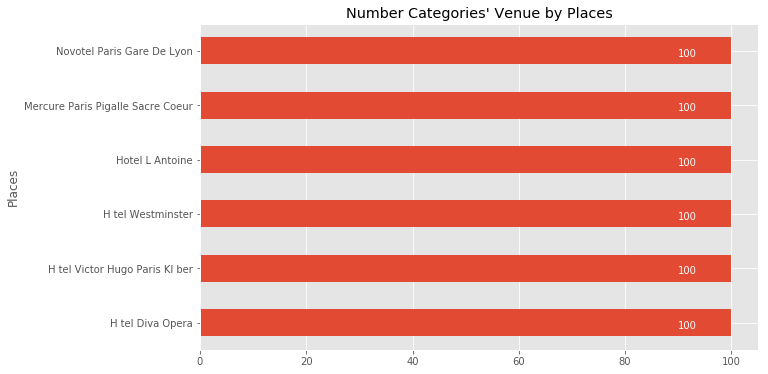

In [124]:
df_Hotel.plot(kind='barh', figsize=(10,6))

#plt.xlabel('name') # add to x-label to the plot
#plt.ylabel('Number de categories') # add y-label to the plot
plt.title('Number Categories\' Venue by Places') # add title to the plot

for index, value in enumerate(df_Hotel): 
    label = format(int(value), ',') 
    plt.annotate(label, xy=(value - 10, index - 0.10), color='white')
    
plt.show()

In [115]:
#Let's find out how many unique categories can be curated from all the returned venues¶
print('There are {} uniques categories.'.format(len(Paris_Hotel_data_venues['Venue Category'].unique())))
print(Paris_Hotel_data_venues['Venue Category'].unique() )

There are 137 uniques categories.
['Asian Restaurant' 'Italian Restaurant' 'Dance Studio'
 'Food & Drink Shop' 'Bar' 'Gym / Fitness Center' 'Bookstore'
 'Music Venue' 'Art Gallery' 'Pizza Place' 'Pub' 'Moroccan Restaurant'
 'Tapas Restaurant' 'Bakery' 'Record Shop' 'Cocktail Bar'
 'Japanese Restaurant' 'Middle Eastern Restaurant' 'Bistro'
 'Thai Restaurant' 'Opera House' 'Sandwich Place' 'French Restaurant'
 'Savoyard Restaurant' 'Furniture / Home Store' 'Café' 'Restaurant'
 'Vietnamese Restaurant' 'Wine Bar' 'Plaza' 'Coffee Shop' 'Bridge'
 'Seafood Restaurant' 'Farmers Market' 'Market'
 'Southwestern French Restaurant' 'Butcher' 'Resort' 'Korean Restaurant'
 'Hotel' "Women's Store" 'Bagel Shop' 'Cheese Shop' 'Indian Restaurant'
 'Mexican Restaurant' 'Beer Bar' 'Theater' 'Creperie' 'Supermarket'
 'Convenience Store' 'Indie Movie Theater' 'Corsican Restaurant'
 'Fish & Chips Shop' 'Karaoke Bar' 'Steakhouse' 'Doner Restaurant'
 'Burger Joint' 'Pedestrian Plaza' 'Comedy Club' 'Antique Sho

# Another Analyses for each venue

In [125]:
# one hot encoding
paris_onehot = pd.get_dummies(Paris_Hotel_data_venues[['Venue Category']], prefix="", prefix_sep="")

# add Lieux column back to dataframe
paris_onehot['Places'] = Paris_Hotel_data_venues['Places'] 

# move lieux column to the first column
fixed_columns = [paris_onehot.columns[-1]] + list(paris_onehot.columns[:-1])
paris_onehot = paris_onehot[fixed_columns]

paris_onehot.head()

,Places,Accessories Store,American Restaurant,Antique Shop,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,BBQ Joint,...,Trail,Train Station,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Hotel L Antoine,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Hotel L Antoine,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Hotel L Antoine,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Hotel L Antoine,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Hotel L Antoine,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [126]:
paris_onehot.shape

(600, 138)

In [127]:
# Next, 
# let's group rows by venue
# and by taking the mean of the frequency of occurrence of each category
paris_grouped = paris_onehot.groupby('Places').mean().reset_index()
paris_grouped

,Places,Accessories Store,American Restaurant,Antique Shop,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,BBQ Joint,...,Trail,Train Station,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,H tel Diva Opera,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.01,0.00,0.01,0.00,0.03,0.00,0.00,0.01
1,H tel Victor Hugo Paris Kl ber,0.00,0.01,0.00,0.00,0.02,0.00,0.01,0.00,0.00,...,0.00,0.00,0.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00
2,H tel Westminster,0.01,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.00,...,0.00,0.00,0.00,0.01,0.00,0.01,0.02,0.00,0.01,0.00
3,Hotel L Antoine,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.01,0.00,...,0.00,0.00,0.00,0.00,0.00,0.02,0.03,0.00,0.01,0.00
4,Mercure Paris Pigalle Sacre Coeur,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.01,0.01,...,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.00
5,Novotel Paris Gare De Lyon,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.01,0.01,0.00,0.00,0.00,0.00,0.03,0.02,0.00,0.00


In [128]:
#Let's print each venue along with the top 20 most common venues¶
num_top_venues = 20

for hood in paris_grouped['Places']:
    print("----"+hood+"----")
    temp = paris_grouped[paris_grouped['Places'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----H tel Diva Opera----
                   venue  freq
0      French Restaurant  0.14
1                  Hotel  0.07
2                    Bar  0.06
3            Pizza Place  0.05
4     Italian Restaurant  0.04
5            Coffee Shop  0.03
6               Wine Bar  0.03
7    Japanese Restaurant  0.03
8        Thai Restaurant  0.02
9                 Bistro  0.02
10   Corsican Restaurant  0.02
11      Doner Restaurant  0.02
12    Chinese Restaurant  0.02
13          Burger Joint  0.02
14  Gym / Fitness Center  0.02
15    Mexican Restaurant  0.02
16   Indie Movie Theater  0.02
17      Pedestrian Plaza  0.01
18    Falafel Restaurant  0.01
19        Sandwich Place  0.01


----H tel Victor Hugo Paris Kl ber----
                  venue  freq
0     French Restaurant  0.23
1                 Hotel  0.19
2    Italian Restaurant  0.10
3                  Café  0.05
4                Bakery  0.03
5     Indian Restaurant  0.02
6           Salad Place  0.02
7                   Spa  0.02
8            

In [129]:
#Let's put that into a pandas dataframe
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [131]:
#Now let's create the new dataframe 
#and display the top 20 venues for each.
num_top_venues = 20

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Places']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
lieux_venues_sorted = pd.DataFrame(columns=columns)
lieux_venues_sorted['Places'] = paris_grouped['Places']

for ind in np.arange(paris_grouped.shape[0]):
    lieux_venues_sorted.iloc[ind, 1:] = return_most_common_venues(paris_grouped.iloc[ind, :], num_top_venues)

lieux_venues_sorted

,Places,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
0,H tel Diva Opera,French Restaurant,Hotel,Bar,Pizza Place,Italian Restaurant,Japanese Restaurant,Wine Bar,Coffee Shop,Thai Restaurant,...,Corsican Restaurant,Gym / Fitness Center,Mexican Restaurant,Doner Restaurant,Burger Joint,Chinese Restaurant,Bistro,Karaoke Bar,Cocktail Bar,Modern European Restaurant
1,H tel Victor Hugo Paris Kl ber,French Restaurant,Hotel,Italian Restaurant,Café,Bakery,Indian Restaurant,Spa,Japanese Restaurant,Salad Place,...,Ice Cream Shop,Garden,Pub,Candy Store,Plaza,Cantonese Restaurant,Gourmet Shop,Chinese Restaurant,Clothing Store,Coffee Shop
2,H tel Westminster,Hotel,Japanese Restaurant,French Restaurant,Gourmet Shop,Chocolate Shop,Plaza,Jewelry Store,Bakery,Boutique,...,Taiwanese Restaurant,Dessert Shop,Men's Store,Food & Drink Shop,Wine Bar,Bookstore,Korean Restaurant,Concert Hall,Cocktail Bar,Convenience Store
3,Hotel L Antoine,French Restaurant,Bar,Cocktail Bar,Bistro,Italian Restaurant,Café,Thai Restaurant,Pizza Place,Wine Bar,...,Pub,Restaurant,Hotel,Bakery,Plaza,Coffee Shop,Vietnamese Restaurant,Farmers Market,Convenience Store,Japanese Restaurant
4,Mercure Paris Pigalle Sacre Coeur,French Restaurant,Hotel,Italian Restaurant,Bar,Cocktail Bar,Japanese Restaurant,Plaza,Bakery,Wine Bar,...,Chinese Restaurant,Coffee Shop,Music Venue,Bistro,Concert Hall,Comedy Club,Hotel Bar,Ice Cream Shop,Indie Movie Theater,Candy Store
5,Novotel Paris Gare De Lyon,French Restaurant,Hotel,Sandwich Place,Coffee Shop,Italian Restaurant,Bar,Wine Bar,Bakery,Café,...,Convenience Store,Japanese Restaurant,Bistro,Pizza Place,Farmers Market,Wine Shop,Beer Garden,Chinese Restaurant,Newsstand,Cocktail Bar


In [132]:
# set number of clusters
kclusters = 3

paris_grouped_clustering = paris_grouped.drop('Places', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(paris_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 2, 1, 0, 2, 2])

In [133]:
#Let's create a new dataframe that includes the cluster as well as the top 5 venues for each Lieux.

paris_merged = Paris_Hotel_data

# add clustering labels
paris_merged['Cluster Labels'] = kmeans.labels_[0:10]

paris_merged = paris_merged.join(lieux_venues_sorted.set_index('Places'), on='Hotel_Name')
paris_merged 
# check the last columns!

,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,...,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
Paris_Hotel_Address,,,,,,,,,,,,,,,,,,,,,
10 12 rue de Charonne 11th arr 75011 Paris France,84,10-10-2015,8.9,Hotel L Antoine,Abkhazia Georgia,No Negative,0,796,The Hotel is situated close to the Ledru Roll...,199,...,Pub,Restaurant,Hotel,Bakery,Plaza,Coffee Shop,Vietnamese Restaurant,Farmers Market,Convenience Store,Japanese Restaurant
11 rue de Tr vise 9th arr 75009 Paris France,111,5/27/2016,8.3,H tel Diva Opera,Abkhazia Georgia,Nothing not to like,5,1353,Nice big bed toiletries provided and tea coff...,16,...,Corsican Restaurant,Gym / Fitness Center,Mexican Restaurant,Doner Restaurant,Burger Joint,Chinese Restaurant,Bistro,Karaoke Bar,Cocktail Bar,Modern European Restaurant
13 Rue De La Paix 2nd arr 75002 Paris France,158,10/23/2016,8.4,H tel Westminster,Albania,Bedroom very small,4,1374,Everything was perfect,4,...,Taiwanese Restaurant,Dessert Shop,Men's Store,Food & Drink Shop,Wine Bar,Bookstore,Korean Restaurant,Concert Hall,Cocktail Bar,Convenience Store
19 Rue Copernic 16th arr 75016 Paris France,33,11/27/2016,7.9,H tel Victor Hugo Paris Kl ber,Albania,,2,236,I liked everything I want to thank the staff ...,93,...,Ice Cream Shop,Garden,Pub,Candy Store,Plaza,Cantonese Restaurant,Gourmet Shop,Chinese Restaurant,Clothing Store,Coffee Shop
2 Rue Hector Malot 12th arr 75012 Paris France,353,5/14/2017,8.5,Novotel Paris Gare De Lyon,Albania,No Negative,0,3583,The hotel was very good at all Its close to t...,35,...,Convenience Store,Japanese Restaurant,Bistro,Pizza Place,Farmers Market,Wine Shop,Beer Garden,Chinese Restaurant,Newsstand,Cocktail Bar
21 Boulevard De Clichy 9th arr 75009 Paris France,44,10-02-2016,8.3,Mercure Paris Pigalle Sacre Coeur,Albania,Nothing,2,441,Everything,2,...,Chinese Restaurant,Coffee Shop,Music Venue,Bistro,Concert Hall,Comedy Club,Hotel Bar,Ice Cream Shop,Indie Movie Theater,Candy Store


In [140]:

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=14)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(paris_merged['lat'], paris_merged['lng'], paris_merged['Hotel_Name'], paris_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [141]:
# Cluster 0 == Hotel L Antonio,H tel Victor Hugo Paris Kl ber Cluster
paris_merged.loc[paris_merged['Cluster Labels'] == 0, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]

,Review_Date,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,...,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
Paris_Hotel_Address,,,,,,,,,,,,,,,,,,,,,
10 12 rue de Charonne 11th arr 75011 Paris France,10-10-2015,No Negative,0,796,The Hotel is situated close to the Ledru Roll...,199,1,10.0,"[' Leisure trip ', ' Couple ', ' Classic Doubl...",663 day,...,Pub,Restaurant,Hotel,Bakery,Plaza,Coffee Shop,Vietnamese Restaurant,Farmers Market,Convenience Store,Japanese Restaurant
19 Rue Copernic 16th arr 75016 Paris France,11/27/2016,,2,236,I liked everything I want to thank the staff ...,93,1,10.0,"[' Business trip ', ' Group ', ' Classic Doubl...",249 day,...,Ice Cream Shop,Garden,Pub,Candy Store,Plaza,Cantonese Restaurant,Gourmet Shop,Chinese Restaurant,Clothing Store,Coffee Shop


In [142]:
# Cluster 1 == H tel Westminster
paris_merged.loc[paris_merged['Cluster Labels'] == 1, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]

,Review_Date,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,...,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
Paris_Hotel_Address,,,,,,,,,,,,,,,,,,,,,
13 Rue De La Paix 2nd arr 75002 Paris France,10/23/2016,Bedroom very small,4,1374,Everything was perfect,4,1,10.0,"[' Business trip ', ' Solo traveler ', ' Super...",284 day,...,Taiwanese Restaurant,Dessert Shop,Men's Store,Food & Drink Shop,Wine Bar,Bookstore,Korean Restaurant,Concert Hall,Cocktail Bar,Convenience Store


In [143]:
# Cluster 2 == Novotel Paris Gare De Lyon,Mercure Paris Pigalle Sacre Coeur,H tel Diva Opera
paris_merged.loc[paris_merged['Cluster Labels'] == 2, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]

,Review_Date,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,...,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
Paris_Hotel_Address,,,,,,,,,,,,,,,,,,,,,
11 rue de Tr vise 9th arr 75009 Paris France,5/27/2016,Nothing not to like,5,1353,Nice big bed toiletries provided and tea coff...,16,3,9.6,"[' Business trip ', ' Solo traveler ', ' Stand...",433 day,...,Corsican Restaurant,Gym / Fitness Center,Mexican Restaurant,Doner Restaurant,Burger Joint,Chinese Restaurant,Bistro,Karaoke Bar,Cocktail Bar,Modern European Restaurant
2 Rue Hector Malot 12th arr 75012 Paris France,5/14/2017,No Negative,0,3583,The hotel was very good at all Its close to t...,35,2,10.0,"[' Leisure trip ', ' Family with young childre...",81 days,...,Convenience Store,Japanese Restaurant,Bistro,Pizza Place,Farmers Market,Wine Shop,Beer Garden,Chinese Restaurant,Newsstand,Cocktail Bar
21 Boulevard De Clichy 9th arr 75009 Paris France,10-02-2016,Nothing,2,441,Everything,2,12,10.0,"[' Leisure trip ', ' Family with young childre...",305 day,...,Chinese Restaurant,Coffee Shop,Music Venue,Bistro,Concert Hall,Comedy Club,Hotel Bar,Ice Cream Shop,Indie Movie Theater,Candy Store


### The most common business we find near the best hotels is the food business. Number of French, Italian restaurants could be found here that includes the coffee bar, resto bar, Gym, Music Venue etc.
### Apart from the food related businesses, we have other types of business that maybe found throughout the Paris but not near these venues
### so the list of possible ideas could be the '1. Travel and Guide', '2. Gifts/ Cultural Shops', '3. Taxi Businesses', '4. Jewelleries and Accessories Shops', '5. Photography', '6. Unique Imported Wines Business', '7. Sell Beauty and Wellness Products', '8. Natural Food Business' etc..